Importando as bibliotecas:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras import regularizers
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Importando o dataset:

In [ ]:
diabetes_dataset = load_diabetes()
print(diabetes_dataset["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

Tratando o dataset:

In [ ]:
# Definindo as entreadas e os resultados
data = diabetes_dataset["data"]
targets = diabetes_dataset["target"]

In [ ]:
# Normalizando os dados (Esse procedimento torna as curvas de treinamento mais claras)
targets = (targets - targets.mean(axis=0)) / targets.std()

In [ ]:
# Separando o dataset em treinamento e teste
train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1)

Definindo o modelo:

In [ ]:
def get_regularised_model(wd, rate): # wd = Weight Decay;
  model = Sequential([
      Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu', input_shape=(train_data.shape[1],)),
      Dropout(rate),
      Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
      Dropout(rate),
      Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
      Dropout(rate),
      Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
      Dropout(rate),
      Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
      Dropout(rate),
      Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
      Dense(1)
  ])
  return model

In [ ]:
# Criando o modelo
model = get_regularised_model(1e-5, 0.3)

In [ ]:
# Complicando o modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
# Treinando o modelo:
history = model.fit(train_data, train_targets, epochs=100,
                    validation_split=0.15, batch_size=64, verbose=False)

In [ ]:
# Avaliando o modelo:
model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 0.6798 - mae: 0.6646 - 22ms/epoch - 11ms/step


[0.6797767877578735, 0.6645677089691162]

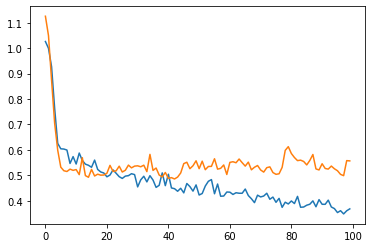

In [ ]:
# Plotando a perda de treino e validação
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

# Callback

Importando as bibliotecas:

In [ ]:
from tensorflow.keras.callbacks import Callback

Definindo os callbacks:

Treinamento:

In [ ]:
class TrainingCallback(Callback):

  def on_train_begin(self, logs=None):
    print("Starting training...")

  def on_epoch_begin(self, epoch, logs=None):
    print(f"Starting epoch {epoch}")

  def on_train_batch_begin(self, batch, logs=None):
    print(f"Training: Finished batch {batch}")

  def on_epoch_end(self, epoch, logs=None):
    print(f"Finished epoch {epoch}")

  def on_train_end(self, logs=None):
    print("Finished training")

Teste:

In [ ]:
class TestingCallback(Callback):

  def on_train_begin(self, logs=None):
    print("Starting training...")

  def on_epoch_begin(self, epoch, logs=None):
    print(f"Starting epoch {epoch}")

  def on_train_batch_begin(self, batch, logs=None):
    print(f"Training: Finished batch {batch}")

  def on_epoch_end(self, epoch, logs=None):
    print(f"Finished epoch {epoch}")

  def on_train_end(self, logs=None):
    print("Finished training")

Predição:

In [ ]:
class PredictionCallback(Callback):

  def on_train_begin(self, logs=None):
    print("Starting training...")

  def on_epoch_begin(self, epoch, logs=None):
    print(f"Starting epoch {epoch}")

  def on_train_batch_begin(self, batch, logs=None):
    print(f"Training: Finished batch {batch}")

  def on_epoch_end(self, epoch, logs=None):
    print(f"Finished epoch {epoch}")

  def on_train_end(self, logs=None):
    print("Finished training")

Reconstruindo o modelo:

In [ ]:
model = get_regularised_model(1e-5, 0.3)

Compilando o modelo:

In [ ]:
model.compile(optimizer='adam', loss='mse')

Treinando o modelo e usando os callbacks:

In [ ]:
model.fit(train_data, train_targets, epochs=3, batch_size=128, verbose=False, callbacks=[TrainingCallback()])

Starting training...
Starting epoch 0
Training: Finished batch 0
Training: Finished batch 1
Training: Finished batch 2
Training: Finished batch 3
Finished epoch 0
Starting epoch 1
Training: Finished batch 0
Training: Finished batch 1
Training: Finished batch 2
Training: Finished batch 3
Finished epoch 1
Starting epoch 2
Training: Finished batch 0
Training: Finished batch 1
Training: Finished batch 2
Training: Finished batch 3
Finished epoch 2
Finished training


In [ ]:
model.evaluate(test_data, test_targets, verbose=False, callbacks=[TestingCallback()])

0.5905895829200745

In [ ]:
model.predict(test_data, verbose=False, callbacks=[PredictionCallback()])

array([[ 1.50644844e-02],
       [ 8.79931822e-02],
       [-1.51748866e-01],
       [-6.63853716e-05],
       [-3.96682806e-02],
       [-1.17057189e-01],
       [-1.20280296e-01],
       [ 1.57017373e-02],
       [ 8.10210630e-02],
       [-1.10672772e-01],
       [-6.88302889e-02],
       [-7.33620524e-02],
       [ 2.49387566e-02],
       [ 5.25802933e-02],
       [-7.57249538e-04],
       [ 5.40759228e-02],
       [-1.15404263e-01],
       [-8.62760842e-02],
       [ 7.65653327e-02],
       [ 1.82780419e-02],
       [ 2.84274165e-02],
       [-9.83062536e-02],
       [-8.25696997e-03],
       [ 4.55182642e-02],
       [ 9.06956196e-02],
       [-1.16118826e-01],
       [ 1.13550536e-01],
       [-2.87344791e-02],
       [ 6.83993548e-02],
       [-2.47108634e-03],
       [ 8.02317820e-03],
       [ 5.59936911e-02],
       [-3.88011150e-02],
       [ 6.03723750e-02],
       [ 3.51972529e-03],
       [ 8.92214179e-02],
       [-1.34594917e-01],
       [-8.67196769e-02],
       [ 1.6

# Early stopping / patience

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

## Unregularized model

Definindo o modelo:

In [ ]:
def get_model(): # wd = Weight Decay;
  model = Sequential([
      Dense(128, activation='relu', input_shape=(train_data.shape[1],)),
      Dense(128, activation='relu'),
      Dense(128, activation='relu'),
      Dense(128, activation='relu'),
      Dense(128, activation='relu'),
      Dense(128, activation='relu'),
      Dense(1)
  ])
  return model

Contruindo o modelo:

In [ ]:
unregularized_model = get_model()

Compilando o modelo:

In [ ]:
unregularized_model.compile(optimizer='adam', loss='mse')

Treinando o modelo:

In [ ]:
unreg_history = unregularized_model.fit(train_data, train_targets, epochs = 100,
                                        validation_split = 0.15, batch_size = 32, verbose = False,
                                        callbacks=[EarlyStopping(patience=2)])

Avaliando o modelo:

In [ ]:
unregularized_model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 0.5475 - 30ms/epoch - 15ms/step


0.5474873781204224

## Regularized model

Construindo o modelo:

In [ ]:
regularized_model = get_regularised_model(1e-8, 0.2)

Compilando o modelo:

In [ ]:
regularized_model.compile(optimizer='adam', loss='mse')

Treinando o modelo:

In [ ]:
reg_history = unregularized_model.fit(train_data, train_targets, epochs = 100,
                                        validation_split = 0.15, batch_size = 32, verbose = False,
                                        callbacks=[EarlyStopping(patience=2)])

Avaliando o modelo:

In [ ]:
regularized_model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 0.6456 - 215ms/epoch - 108ms/step


0.6456092000007629

Comparando o desempenho dos dois modelos:

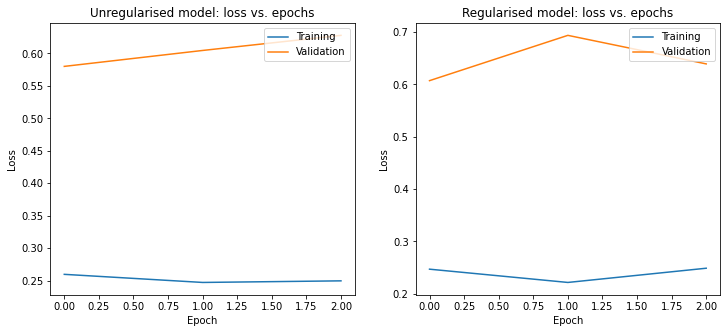

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()